In [12]:
import pickle as cPickle
import gzip

import numpy as np
%pylab inline 
import matplotlib.pyplot as pl

from PIL import Image
import PIL.ImageOps 

Populating the interactive namespace from numpy and matplotlib


In [13]:
dirPath = 'ASL/signs/'
import os
signs = ''
for f in os.listdir(dirPath):
    fname = dirPath+f
    base=os.path.basename(fname)
    sign = os.path.splitext(base)[0]
    signs += sign
    pass
signs = sorted(signs)
print(signs)
print(len(signs))
signs.index('z')

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
26


25

(251, 250)
0


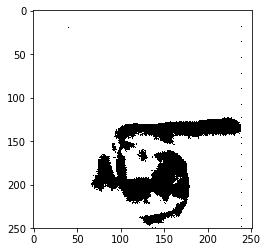

In [27]:
im = Image.open('ASL/signs/z.jpg')
im = PIL.ImageOps.invert(im)
im = im.convert('1')
im.save('result.png')
(width, height) = im.size
im.size
print(im.size)
px=im.getpixel((60, 95))
print(px)

imgB = np.asarray(im)
imgB
pl.imshow(imgB,cmap='Greys')

In [ ]:
def load_data():
    '''
    traning_data - массив из 50000 тренировочных примеров, 
    0 - элемент содержит массив массивов бит изображений
    1 - соответствующий картинке номер
    validation_data и test_data аналогичные, но содержат 
    по 10000 значений
    '''
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = cPickle.load(f,encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

In [ ]:
def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [ ]:
def load_data_wrapper():
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    #print(training_inputs[0])
    #print(training_results[0])
    training_data = zip(training_inputs, training_results)
    #print(training_data[0])
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_zipped = zip(test_inputs, te_d[1])
    # print(training_data, validation_data, test_zipped)
    return (training_data, validation_data,test_zipped)

In [ ]:
# training, validation, test=load_data_wrapper()


In [ ]:
#trd = list(training)

In [ ]:
#print(len(trd))
#print(trd[1:10][1])
#nerobit = trd[0:2]
#print(len(nerobit))
#print(nerobit[0][0])

#mini_batches =[trd[0:10]
#                for k in range(0, n, 10)]

In [ ]:
def vectorized_result(j,size):
    e = np.zeros((10, size))
    print('size',size)
    cnt=0
    for i in j:
        print('i:',i,'j:',j)
        e[i][cnt] = 1.0
        cnt+=1
    return e

In [ ]:
training, validation, test = load_data()
Xdisplay = np.reshape(training[0][1],(28,28))
y = vectorized_result(training[1][0:5],5)
print(y)
#print(training[1][0:10])
pl.imshow(Xdisplay,cmap='Greys')
pl.xlabel(('Number %d' % training[1][1]))  
X = np.float32(training[0][0:5])#, dtype('float32')

In [ ]:
print(X.T.shape)
# b = np.dot(X.T,5)
# for ln in b:
#     for el in ln:
#         if el >0:
#             print(el)

In [ ]:
#testInput = np.arange(-6,6,0.01)
#plot(testInput, sigmoid(testInput), linewidth= 2)
#grid(1)

In [ ]:
#net = Neural_Network()

In [ ]:
#net.forward(X)

In [ ]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 28*28
        self.outputLayerSize = 10
        self.hiddenLayerSize = 20
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        # print (self.W1.shape,self.W2.shape)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        # print ('z2',self.z2)
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        # print (J)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        # print('YHat',self.yHat)
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        # print('delta',delta3)
        # print('delta.shape',delta3.shape)
        # print('a2',self.a2.shape)
        dJdW2 = np.dot(self.a2.T, delta3)
        # print('Djdw',dJdW2)
        
        delta2 = np.float32(np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2))
        # print('delta2', delta2)
        # print('delta2.shape:',delta2.shape)
        # print('X.T.shape:',X.T.shape)

        dJdW1 = np.dot(X.T, delta2)
#         for ln in dJdW1:
#             for el in ln:
#                 if el >0:
#                     print(el)
        # dJdW1 = np.dot(2, delta2)
        # dJdW1 = np.dot(X.T, 2)
        # print (dJdW1,dJdW2)
        # print('sigmoid.z2',self.sigmoidPrime(self.z2))
        # print('W2.T',self.W2.T.shape)
        # print('delta2',delta2.shape)
        # print('X.T',X.T.shape)
        return dJdW1, dJdW2
    
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [ ]:
NN = Neural_Network()

In [ ]:
NN.forward(X)

In [ ]:
cost1 = NN.costFunction(X,y.T)

In [ ]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y.T)

In [ ]:
print('dJdW1',dJdW1,'dJdW2',dJdW2)

In [ ]:
costarr=[]
for i in range(0,10):
    cost = NN.costFunction(X,y.T)
    costarr.append(cost)
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y.T)
    scalar = 3
    NN.W1 = NN.W1 - scalar*dJdW1
    NN.W2 = NN.W2 - scalar*dJdW2
print(costarr)

In [ ]:
result=NN.forward(X)
result=np.around(result, decimals = 2)
print(result)
# print(y.T)
yarr=training[1][0:5]
res=[np.argmax(i) for i in  result]
print(res)
print(yarr)
# print(list(zip(res,yarr)))
sum(int(x == y) for (x, y) in list(zip(res,yarr)))

In [ ]:
plot(costarr)
grid(1)
xlabel('Iterations')
ylabel('Cost')